## Trabajo práctico 2.

Jerónimo Barragán. LU: 1472/21.
Manuel Max Gonzalez. LU: 1229/21.

Importamos las librerías que vamos a usar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

In [2]:
def metodoDelDescenso(A, b, x0, N):
    x = x0
    errores = np.array([])
    for i in range(0,N):
        r = b-A@x
        t = (r@r)/(r@A@r)
        x = x + t*r
        error = np.linalg.norm(b-A@x)
        errores = np.append(errores, error)
    return([x, errores])

## Ejercicio 2

Text(0, 0.5, 'Error')

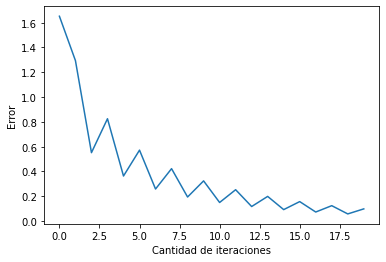

In [3]:
M = np.random.rand(10, 10)
A = (np.transpose(M)@M) + np.identity(10)
b = np.random.rand(10)
x0 = np.random.rand(10)

metodo = metodoDelDescenso(A,b,x0,20)
errores = metodo[1]
plt.plot(errores)
plt.xlabel("Cantidad de iteraciones")
plt.ylabel("Error")

## Ejercicio 3

In [4]:
def gramSchmidt(d, v, A):
    u = v
    for i in range(0, len(d)):
        di = d[i]
        u = u - ((v@A@di)/(di@A@di))*di
    return (u)

## Ejercicio 4

In [5]:
def gradienteConjugado(A, x0, b, n):
    x = x0
    d = []
    errores = np.array([])
    for i in range(0, n):
        r = b - A@x
        r1 = gramSchmidt(d, r, A)
        t = (r1@r)/(r1@A@r1)
        x = x + t*r1
        d.append(r1)
        error = np.linalg.norm(b-A@x)
        errores = np.append(errores, error)
    return ([x, errores])

## Ejercicio 5

Text(0, 0.5, 'Error')

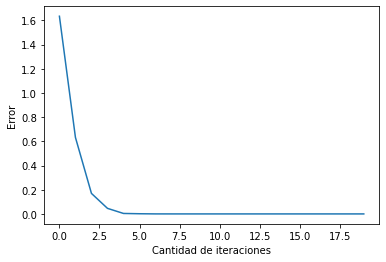

In [6]:
errores_gc = gradienteConjugado(A,b,x0,20)[1]
plt.plot(errores_gc)
plt.xlabel("Cantidad de iteraciones")
plt.ylabel("Error")

Podemos ver que en el método del gradiente conjugado, el error converge a 0 en menos de 10 iteraciones, mientras que en el método del descenso, el error disminuye más lentamente, y no llega a valer 0 tras las primeras 20 iteraciones.  Por lo tanto, para resolver un sistema de ecuaciones lineales, resulta más eficiente el método del gradiente conjugado.